<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/model_selection_selected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

from numpy import mean

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## import data


In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/y_train_ROS.csv', index_col=[0])
X_test = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/y_test.csv', index_col=[0])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_features = X_train.columns
# X_train = X_train.drop('SEQN', axis = 1)
# X_test = X_test.drop('SEQN', axis = 1)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state = random_seed)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'y_train':y_train_val,
                'X_val': X_validation,'y_val':y_validation,
                'X_test': X_test,'y_test':y_test}

In [8]:
X_train.head()

,Age_Years,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Triglyceride_mmol_l,Blood_Cadmium_umol_l,Gamma_Glutamyl_Transferase_U_l,Blood_urea_nitrogen_mmol_L,Waist_Circumference_cm,Platelet_Count,Lactate_Dehydrogenase_U_l,...,BPCuff_Large,BMI_Underweight,ChildEd_5thGrade_or_lower,BPCuff_Thigh,AdultEd_less9th_grade,Marital_Status_Married,BMI_unknown,Household_size,Gum_disease,Marital_Status_Widowed
0,2.0,21.20,1.264,1.073,0.0,18.0,4.28,56.7,224.0,127.0,...,0,0,0,0,0,0,0,7.0,0,0
1,2.0,18.79,1.264,1.073,0.0,18.0,4.28,49.8,346.0,127.0,...,0,0,0,0,0,0,0,7.0,0,0
2,15.0,17.40,0.452,0.485,0.0,9.0,3.57,66.5,265.0,139.0,...,0,1,0,0,0,0,0,5.0,0,0
3,21.0,27.20,0.745,1.073,0.0,14.0,3.57,84.6,208.0,173.0,...,1,0,0,0,0,0,0,4.0,0,0
4,36.0,23.47,0.519,0.621,4.0,17.0,4.28,86.4,316.0,110.0,...,0,0,0,0,0,0,0,2.0,0,0


In [9]:
y_train.head()

AttributeError: ignored

In [10]:
y_train = y_train.replace({'Normal': 1, 'Prediabetes on one or more tests': 2, 'Diabetes on one or more tests': 3})

AttributeError: ignored

In [11]:

y_train.value_counts()


AttributeError: ignored

In [12]:
y_test = y_test.replace({'Normal': 1, 'Prediabetes on one or more tests': 2, 'Diabetes on one or more tests': 3})

AttributeError: ignored

In [13]:
import random

random_seed = random.seed(42)

## standardising


In [14]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)

In [15]:
# check for NaN

X_train_std_nan = X_train_std.columns[X_train_std.isna().any()].tolist()

In [16]:
X_train_std_nan

[]

In [17]:
X_test_std = scaler.fit_transform(X_test)


X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)

## Model comparison


In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 24.0 MB/s eta 0:00:00


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
import catboost
import lightgbm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifiers = []

In [30]:
model1 = xgboost.XGBClassifier(tree_method='gpu_hist', 
                     eta = 0.0,
                     learning_rate=0.1,
                     early_stopping_rounds = 10,
                    n_estimators=1000,
                    max_depth=20,
                    min_child_weight=3,
                    reg_alpha = 1e-05,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.7,
                    colsample_bylevel = 0.9,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=42)
classifiers.append(model1)
model2 = svm.SVC(decision_function_shape='ovo')
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, random_state=random_seed)
classifiers.append(model4)
model5 = svm.LinearSVC()
classifiers.append(model5)
model6 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=random_seed)
classifiers.append(model6)
model7 = OneVsRestClassifier(MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=random_seed))
classifiers.append(model7)

In [31]:
for clf in classifiers:
    clf.fit(X_train_std, y_train)
    y_pred= clf.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              early_stopping_rounds=10, eta=0.0, max_depth=20,
              min_child_weight=3, n_estimators=1000, nthread=4, num_class=9,
              objective='multi:softprob', reg_alpha=1e-05, seed=42,
              subsample=0.8, tree_method='gpu_hist') is 0.469370996879619
Confusion Matrix of XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              early_stopping_rounds=10, eta=0.0, max_depth=20,
              min_child_weight=3, n_estimators=1000, nthread=4, num_class=9,
              objective='multi:softprob', reg_alpha=1e-05, seed=42,
              subsample=0.8, tree_method='gpu_hist') is [[3336 2012 3071]
 [ 228 1454 1010]
 [   7  134  926]]
Accuracy of SVC(decision_function_shape='ovo') is 0.6418131056002627
Confusion Matrix of SVC(decision_function_shape='ovo') is [[5279 2503  637]
 [ 185 1705  802]
 [  26  209  832]]
Accuracy of DecisionTreeClassifier() is 0.6078994908852028
Confusio

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of LinearSVC() is 0.5977171949416982
Confusion Matrix of LinearSVC() is [[4948 2372 1099]
 [ 142 1343 1207]
 [   2   77  988]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is 0.5559205123994088
Confusion Matrix of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is [[4493 2755 1171]
 [  74 1302 1316]
 [   4   88  975]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is 0.5943504680571522
Confusion Matrix of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is [[4746 2703  970]
 [  85 1540 1067]
 [   5  110  952]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

Accuracy of XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              early_stopping_rounds=10, eta=0.0, max_depth=20,
              min_child_weight=3, n_estimators=1000, nthread=4, num_class=9,
              objective='multi:softprob', reg_alpha=1e-05, seed=42,
              subsample=0.8, tree_method='gpu_hist') is 0.8059615700443422
              precision    recall  f1-score   support

     class 1       0.89      0.89      0.89      8419
     class 2       0.57      0.62      0.60      2692
     class 3       0.79      0.57      0.66      1067

    accuracy                           0.81     12178
   macro avg       0.75      0.69      0.72     12178
weighted avg       0.81      0.81      0.81     12178



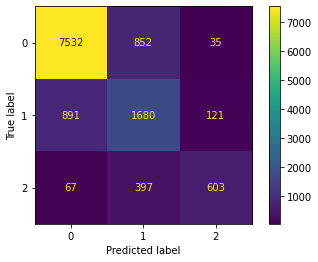

Accuracy of SVC(decision_function_shape='ovo') is 0.5998521924782394
              precision    recall  f1-score   support

     class 1       0.88      0.63      0.73      8419
     class 2       0.33      0.57      0.42      2692
     class 3       0.30      0.44      0.36      1067

    accuracy                           0.60     12178
   macro avg       0.51      0.55      0.50     12178
weighted avg       0.71      0.60      0.63     12178



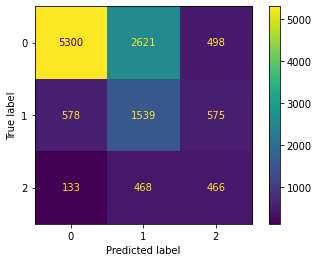

Accuracy of DecisionTreeClassifier() is 0.7152241747413368
              precision    recall  f1-score   support

     class 1       0.83      0.84      0.83      8419
     class 2       0.45      0.45      0.45      2692
     class 3       0.45      0.42      0.43      1067

    accuracy                           0.72     12178
   macro avg       0.58      0.57      0.57     12178
weighted avg       0.71      0.72      0.71     12178



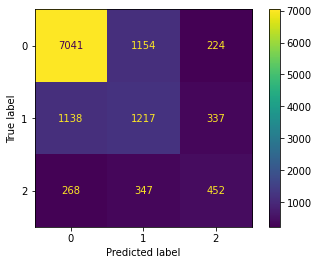

Accuracy of RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500) is 0.7739366069962227
              precision    recall  f1-score   support

     class 1       0.91      0.83      0.87      8419
     class 2       0.50      0.73      0.60      2692
     class 3       0.77      0.42      0.55      1067

    accuracy                           0.77     12178
   macro avg       0.73      0.66      0.67     12178
weighted avg       0.81      0.77      0.78     12178



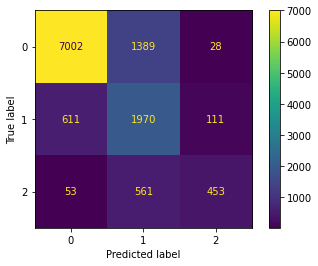

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of LinearSVC() is 0.30571522417474134
              precision    recall  f1-score   support

     class 1       1.00      0.10      0.18      8419
     class 2       0.24      0.98      0.39      2692
     class 3       0.75      0.21      0.32      1067

    accuracy                           0.31     12178
   macro avg       0.66      0.43      0.30     12178
weighted avg       0.81      0.31      0.24     12178



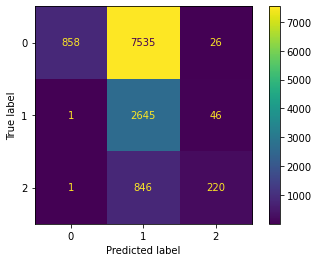

Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is 0.22105436032189194
              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00      8419
     class 2       0.22      1.00      0.36      2692
     class 3       0.00      0.00      0.00      1067

    accuracy                           0.22     12178
   macro avg       0.07      0.33      0.12     12178
weighted avg       0.05      0.22      0.08     12178



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


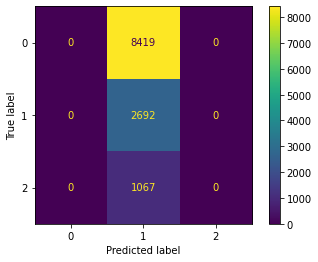

Accuracy of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is 0.687058630316965
              precision    recall  f1-score   support

     class 1       0.69      0.99      0.81      8419
     class 2       0.23      0.01      0.02      2692
     class 3       0.50      0.00      0.00      1067

    accuracy                           0.69     12178
   macro avg       0.47      0.33      0.28     12178
weighted avg       0.57      0.69      0.57     12178



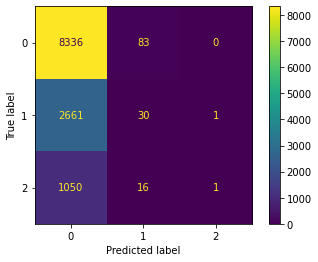

In [33]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    target_names = ['class 1', 'class 2', 'class 3']
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
    plt.show()